In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
from scipy import stats

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

database_path = "../Resources/hawaii.sqlite"

In [5]:
engine = create_engine(f"sqlite:///{database_path}")

In [6]:
# reflect an existing database into a new model
# reflect the tables
Base = automap_base()
Base.prepare(engine, reflect=True)


In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
#inspect the data
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [11]:
columns = inspector.get_columns('measurement')
for column in columns:
     print(column["name"], column["type"])   

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
columns = inspector.get_columns('station')
for column in columns:
     print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:
session.query(func.count(Measurement.date)).all()

[(19550)]

In [14]:
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01')

In [15]:
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

# Exploratory Climate Analysis

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date , Measurement.prcp ).filter(Measurement.date >= "2016-08-24").\
    filter(Measurement.date <= "2017-08-23").order_by(Measurement.date.asc()).all()
results

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [17]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date', 'prcp'])
df = df.rename(columns={"date": "Date","prcp": "Precipitation"})
df.set_index('Date', inplace=True)
df = df.dropna()
df.head()

,Precipitation
Date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,1.22
2016-08-24,2.15


In [18]:
x_axis = np.arange(len(df))
tick_locations = [value for value in x_axis]

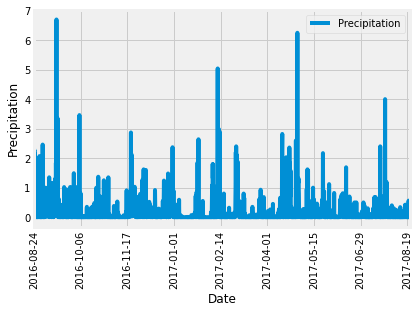

In [19]:
df.plot(rot = 90)
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.show()

In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Station Analysis

In [21]:
# Design a query to show how many stations are available in this dataset?
results = session.query(Station.station,func.count(Station.station)).group_by(Station.station).all()
results
count = 0
for row in results:
    count = count +1

print(f"Total number of stations in Hawaii:{count}")

Total number of stations in Hawaii:9


In [22]:
# List the stations and the counts in descending order.
numOfStations = session.query(Measurement.station, Station.id, Station.name, func.count(Measurement.tobs)).\
                filter(Measurement.station == Station.station).\
                group_by(Measurement.station).\
                order_by(func.count(Measurement.tobs).desc()).all()
numOfStations

[('USC00519281', 7, 'WAIHEE 837.5, HI US', 2772),
 ('USC00519397', 1, 'WAIKIKI 717.2, HI US', 2724),
 ('USC00513117', 2, 'KANEOHE 838.1, HI US', 2709),
 ('USC00519523', 6, 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669),
 ('USC00516128', 9, 'MANOA LYON ARBO 785.2, HI US', 2612),
 ('USC00514830', 3, 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202),
 ('USC00511918', 8, 'HONOLULU OBSERVATORY 702.2, HI US', 1979),
 ('USC00517948', 4, 'PEARL CITY, HI US', 1372),
 ('USC00518838', 5, 'UPPER WAHIAWA 874.3, HI US', 511)]

In [23]:
# What are the most active stations? (i.e. what stations have the most rows)?
for row in numOfStations:
    active_station_name = row.name
    most_active_station = row.station
    break
print(f"The most active station in Hawaii is: {row.station}")
print(f"Name of the most active station in Hawaii is: {row.name}")

The most active station in Hawaii is: USC00519281
Name of the most active station in Hawaii is: WAIHEE 837.5, HI US


In [24]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
sel = [func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)]
active_station_temp = session.query(*sel).\
                filter(Measurement.station == most_active_station).all()
active_station_temp

[(54.0, 85.0, 71.66378066378067)]

In [25]:
results = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
                filter(Measurement.date >= "2017-08-23").all()
results = list(results)[0]
results

(76.0, 80.25, 82.0)

In [26]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_station_year_temp = session.query(Measurement.tobs).\
                            filter(Measurement.station == most_active_station).\
                            filter(Measurement.date >="2016-08-24").\
                            filter(Measurement.date <="2017-08-23").all()
active_station_year_temp = [ i[0] for i in active_station_year_temp] 

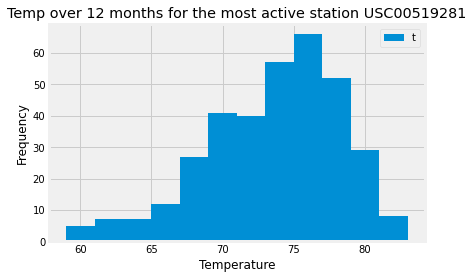

In [27]:
bins =12
labels = 'tobs'
temp = [value for value in active_station_year_temp]
plt.hist(temp, bins=bins)
plt.title("Temp over 12 months for the most active station USC00519281" )
plt.ylabel('Frequency')
plt.xlabel('Temperature')
plt.legend(labels)
plt.show()

# Bonus Challenge Assignment

## Temperature Analysis I

* Hawaii is reputed to enjoy mild weather all year. Is there a meaningful difference between the temperature in, 
for example, June and December?
* You may either use SQLAlchemy or pandas's read_csv() to perform this portion.
* Identify the average temperature in June at all stations across all available years in the dataset. 
Do the same for December temperature.
* Use the t-test to determine whether the difference in the means,
if any, is statistically significant. Will you use a paired t-test, or an unpaired t-test? Why?

In [28]:
sel = [func.avg(Measurement.tobs)]
june_temp = session.query(*sel).\
                            filter(func.strftime("%m", Measurement.date) == "06").\
                            group_by(Measurement.tobs).\
                            order_by(Measurement.date).all()

dec_temp = session.query(*sel).\
                            filter(func.strftime("%m", Measurement.date) == "12").\
                            group_by(Measurement.tobs).\
                            order_by(Measurement.date).all()
june_temp = [ i[0] for i in june_temp] 
dec_temp =[ i[0] for i in dec_temp] 

In [29]:
np.mean(june_temp)

74.5

In [30]:
np.mean(dec_temp)

69.5

* **We can only perform paired t-test as we are comparing means from the same group at different times.** 
* **Our data set is very small to perform unpaired t-test.**
* **A p-value less than 0.05 (in this case 0.023) which is statistically significant.**

In [31]:
stats.ttest_ind(june_temp, dec_temp)

Ttest_indResult(statistic=2.334592594146816, pvalue=0.0237956066675986)

## Temperature Analysis II

In [32]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [33]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip_temp = calc_temps('2017-02-28', '2017-03-05')[0]
list(trip_temp)

[64.0, 72.02777777777777, 78.0]

C:\Users\nihar\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


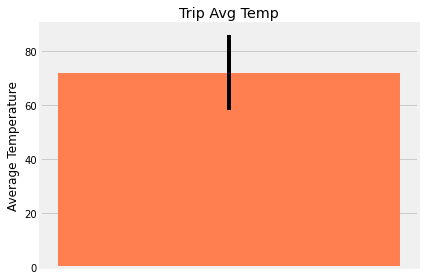

In [34]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
fig,ax = plt.subplots()
x_axis = 1
yerr = trip_temp[2] - trip_temp[0]
y_axis = trip_temp[1]
plt.title("Trip Avg Temp")
plt.ylabel("Average Temperature")
ax.bar(x_axis, y_axis, yerr= yerr, color='coral', align="center")
ax.set(xticks = range(x_axis)) 
fig.tight_layout()
fig.show()

In [35]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
sel = [Measurement.station, Station.name, Station.latitude, Station.longitude, Station.elevation, func.sum(Measurement.prcp)]
amtOfRainfall = session.query(*sel).\
                filter(Measurement.station == Station.station).\
                filter(Measurement.date >= '2017-02-28').filter(Measurement.date <= '2017-03-05').\
                group_by(Measurement.station).\
                order_by(func.sum(Measurement.prcp).desc()).all()
amtOfRainfall

stations = pd.DataFrame(amtOfRainfall, columns=['Station','Name','Latitude','Longitude','Elevation','Prcp'])
stations


,Station,Name,Latitude,Longitude,Elevation,Prcp
0,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,4.72
1,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,4.45
2,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,4.07
3,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,2.98
4,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,2.74
5,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,2.32
6,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,1.16


In [36]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [40]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
import datetime
normals = []
normals_list = []
# Set the start and end date of the trip
start_date = '2017-02-28' 
end_date = '2017-03-05'
# Use the start and end date to create a range of dates
start = dt.datetime.strptime("2017-02-28", "%Y-%m-%d")
end = dt.datetime.strptime("2017-03-05", "%Y-%m-%d")
# Stip off the year and save a list of %m-%d strings

date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]
# Loop through the list of %m-%d strings and calculate the normals for each date
for date in date_generated:
    strp_date = date.strftime("%m-%d")
    normals.append(strp_date)
for day in normals:
    normals_list.append(daily_normals(day)[0])
#normals_list
#normals

['02-28', '03-01', '03-02', '03-03', '03-04']

In [41]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
daily_normals_df = pd.DataFrame(normals_list,columns=['tmin', 'tavg','tmax'],index=[normals])
daily_normals_df

,tmin,tavg,tmax
02-28,65.0,70.655172,80.0
03-01,64.0,70.032787,76.0
03-02,61.0,70.366667,78.0
03-03,60.0,70.068966,78.0
03-04,57.0,69.272727,77.0


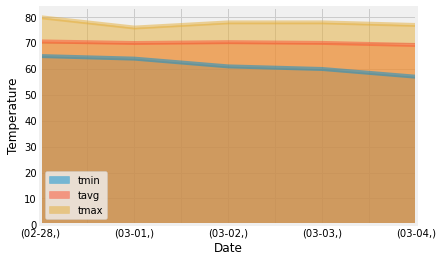

In [42]:
# Plot the daily normals as an area plot with `stacked=False`
ax = daily_normals_df.plot.area(stacked=False)
ax.set_ylabel('Temperature')
ax.set_xlabel('Date')
plt.show()